In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
from sklearn.metrics import classification_report

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print("Classification report for model {} on {} data".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print("Confusion matrix for model {} on {} data ".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['0', '1', '-1'], index=['0', '1', '-1']))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['win', 'tie', 'loss'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print("Parameters of model {}".format(type(model).__name__))
    for k, v in model.get_params().items():
        print(k, v)
    
    print("---------------------------------------------------------------------------------")

    

In [3]:
X_train = pd.read_csv("../preprocessing/X_train.csv")
y_train = pd.read_csv("../preprocessing/y_train.csv")
X_test = pd.read_csv("../preprocessing/X_test.csv")
y_test = pd.read_csv("../preprocessing/y_test.csv")

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

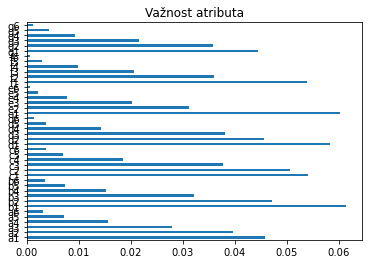

In [5]:
pd.Series(clf.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Važnost atributa")
plt.show()

Iz značajnosti stributa vidimo da je mnogo bitnije da li su i kako popunjena polja u dnu table, nego na vrhu, što i ima smisla s obzirom na to kako se igra igra.

In [6]:
report(clf, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     13294
           0       1.00      1.00      1.00      5154
           1       1.00      1.00      1.00     35597

    accuracy                           1.00     54045
   macro avg       1.00      1.00      1.00     54045
weighted avg       1.00      1.00      1.00     54045

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
        0     1     -1
0   13294     0      0
1       0  5154      0
-1      0     0  35597
---------------------------------------------------------------------------------


In [7]:
report(clf, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.69      0.68      0.68      3341
           0       0.29      0.30      0.29      1295
           1       0.86      0.87      0.86      8876

    accuracy                           0.76     13512
   macro avg       0.61      0.61      0.61     13512
weighted avg       0.76      0.76      0.76     13512

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
       0    1    -1
0   2260  384   697
1    367  383   545
-1   647  543  7686
---------------------------------------------------------------------------------


Vidimo da je preciznost modela na trening podacima 1, ali da je ne test podacima mnogo manja. Dakle možemo pokušati da podesimo hiperparametre.

In [8]:
parameters = {'max_depth' : [2, 4, 6, 8],
             'criterion' : ['gini', 'entropy']}
estimator = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=parameters, cv=3)
estimator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

In [9]:
estimator.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [10]:
estimator.best_score_

0.7295957072809696

In [11]:
report(estimator.best_estimator_, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.67      0.49      0.56     13294
           0       0.50      0.03      0.06      5154
           1       0.76      0.94      0.84     35597

    accuracy                           0.74     54045
   macro avg       0.64      0.48      0.49     54045
weighted avg       0.71      0.74      0.70     54045

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
       0    1     -1
0   6472   66   6756
1    989  169   3996
-1  2209  102  33286
---------------------------------------------------------------------------------


In [12]:
report(estimator.best_estimator_, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.66      0.47      0.55      3341
           0       0.25      0.02      0.03      1295
           1       0.75      0.93      0.83      8876

    accuracy                           0.73     13512
   macro avg       0.55      0.47      0.47     13512
weighted avg       0.68      0.73      0.69     13512

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
       0   1    -1
0   1570  26  1745
1    267  22  1006
-1   550  39  8287
---------------------------------------------------------------------------------


Kako ni ovo nije poboljšalo moć modela, možemo da probamo i ansambl pristup, tj da koristimo šumu.

In [13]:
forest = RandomForestClassifier(n_estimators=5)
forest.fit(X_train, y_train)
report(forest, X_test, y_test, "test")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.68      0.70      0.69      3341
           0       0.32      0.20      0.25      1295
           1       0.86      0.89      0.87      8876

    accuracy                           0.78     13512
   macro avg       0.62      0.60      0.60     13512
weighted avg       0.76      0.78      0.77     13512

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
       0    1    -1
0   2349  260   732
1    434  257   604
-1   692  285  7899
---------------------------------------------------------------------------------


Vidimo da 5 drveta nije poboljšalo kvalitet modela, pa možemo da pokušamo da povećamo broj njih. 

In [14]:
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(X_train, y_train)
report(forest, X_train, y_train)
report(forest, X_test, y_test, "test")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00     13294
           0       1.00      1.00      1.00      5154
           1       1.00      1.00      1.00     35597

    accuracy                           1.00     54045
   macro avg       1.00      1.00      1.00     54045
weighted avg       1.00      1.00      1.00     54045

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
        0     1     -1
0   13294     0      0
1       0  5154      0
-1      0     0  35597
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on t

Kada koristimo 500 drveta, preciznost modela postaje prihvatljiva, ali po cenu interpretabilnosti i vizualizacije.

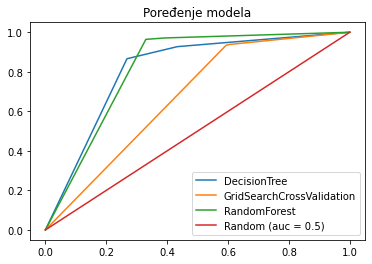

In [45]:
models = [clf, estimator.best_estimator_, forest]
names = ['DecisionTree', 'GridSearchCrossValidation', 'RandomForest']
set = zip(models, names)
for model, name in set:
    y_pred = model.predict(X_test)
    falsePR, truePR, _ = roc_curve(y_test, y_pred, pos_label=1)
#     auc = roc_auc_score(y_test, y_pred, multi_class="ovr", average="micro")
    label = name 
    plt.plot(falsePR, truePR, label=label)
plt.plot([0,1], [0,1], label='Random (auc = 0.5)')
plt.title("Poređenje modela")
plt.legend()
plt.show()

Vidimo da najbolje performanse ima Random Forest, [to